In [187]:
#Test

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import datetime
import imageio

In [189]:
df = pd.read_csv("datasets/luftklima_reformatted.csv", delimiter=",")

In [190]:
df.head()

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
0,0,034003AA,Goetheanum,2020-04-02 08:39:53+02:00,2020-04-02,8,39,"47.53934,7.60146",47.53934,7.601460,15.7400,0.0,0.0,0.6
1,1,03400395,Hegenheimermattweg,2020-04-16 04:49:29+02:00,2020-04-16,4,49,"47.57551,7.58309",47.57551,7.583090,6.6333,0.0,0.0,0.0
2,2,0340997E,Laufenstrasse,2020-04-18 05:41:57+02:00,2020-04-18,5,41,"47.5935204569,7.59419060652",47.59352,7.594191,13.2700,0.0,0.0,0.0
3,3,0340018F,Areal Wolf (Mast 7),2020-04-20 11:49:23+02:00,2020-04-20,11,49,"47.54245,7.61357",47.54245,7.613570,17.7100,0.0,0.0,0.0
4,4,034001AD,Areal Wolf (Mast 6),2020-04-20 11:50:09+02:00,2020-04-20,11,50,"47.54431,7.60302",47.54431,7.603020,16.7150,0.0,0.0,0.0


In [191]:
basel_map = plt.imread("maps/new_basel_smartclimate_map.png")

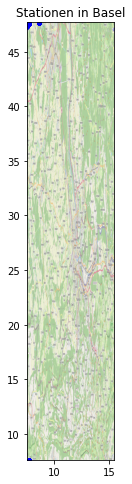

In [192]:
BBox = (df.Längengrad.min(), df.Längengrad.max(),df.Breitengrad.min(), df.Breitengrad.max())
fig, ax = plt.subplots(figsize = (8.53,8.05))
ax.scatter(df.Längengrad, df.Breitengrad, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Stationen in Basel')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(basel_map, zorder=0, extent = BBox, aspect= 'equal')

In [193]:
df.sort_values(by=["Breitengrad"])

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
15127,15127,03409973,Schwarzwaldstraße,2020-05-12 22:58:48+02:00,2020-05-12,22,58,"7.62377820841,7.67069959297",7.623778,7.670700,11.8700,0.0,0.2,0.2
15887,15887,03409973,Schwarzwaldstraße,2020-05-13 06:58:47+02:00,2020-05-13,6,58,"7.62377820841,7.67069959297",7.623778,7.670700,7.9400,0.0,0.2,0.2
5507,5507,03409973,Schwarzwaldstraße,2020-05-08 17:07:12+02:00,2020-05-08,17,7,"7.62377820841,7.67069959297",7.623778,7.670700,28.0750,0.0,0.0,0.0
23577,23577,03409973,Schwarzwaldstraße,2020-05-16 17:56:29+02:00,2020-05-16,17,56,"7.62377820841,7.67069959297",7.623778,7.670700,22.7600,0.0,0.0,0.0
14395,14395,03409973,Schwarzwaldstraße,2020-05-12 14:58:49+02:00,2020-05-12,14,58,"7.62377820841,7.67069959297",7.623778,7.670700,15.4100,0.0,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242315,242315,03409FE9,ex deBW Colmarer Straße,2020-08-07 14:07:38+02:00,2020-08-07,14,7,"47.6935517966,7.59418859482",47.693552,7.594189,26.1600,0.0,0.0,0.0
210725,210725,03409FE9,ex deBW Colmarer Straße,2020-07-27 16:08:21+02:00,2020-07-27,16,8,"47.6935517966,7.59418859482",47.693552,7.594189,27.1550,0.0,0.0,0.0
224638,224638,03409FE9,ex deBW Colmarer Straße,2020-08-01 12:08:02+02:00,2020-08-01,12,8,"47.6935517966,7.59418859482",47.693552,7.594189,27.7500,0.0,0.0,0.0
242474,242474,03409FE9,ex deBW Colmarer Straße,2020-08-07 15:52:38+02:00,2020-08-07,15,52,"47.6935517966,7.59418859482",47.693552,7.594189,26.3750,0.0,0.0,0.0


In [194]:
df = df.drop(df[df["Station-ID"] == "03409973"].index) #Breitengrad von 7.62 anstatt 47

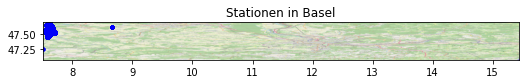

In [195]:
BBox = (df.Längengrad.min(), df.Längengrad.max(),df.Breitengrad.min(), df.Breitengrad.max())
fig, ax = plt.subplots(figsize = (8.53,8.05))
ax.scatter(df.Längengrad, df.Breitengrad, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Stationen in Basel')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(basel_map, zorder=0, extent = BBox, aspect= 'equal')

In [196]:
df.sort_values(by=["Längengrad"])

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
1017955,1017955,03A0B2CB,Weissenstein (Jura),2021-04-27 10:00:00+02:00,2021-04-27,10,0,"47.253517,7.50797",47.253517,7.50797,6.18,0.0,30.0,30.0
1012800,1012800,03A0B2CB,Weissenstein (Jura),2021-04-25 21:00:00+02:00,2021-04-25,21,0,"47.253517,7.50797",47.253517,7.50797,6.18,0.0,30.0,30.0
1012801,1012801,03A0B2CB,Weissenstein (Jura),2021-04-25 21:00:00+02:00,2021-04-25,21,0,"47.253517,7.50797",47.253517,7.50797,0.85,0.0,143.0,143.0
1018232,1018232,03A0B2CB,Weissenstein (Jura),2021-04-27 12:00:00+02:00,2021-04-27,12,0,"47.253517,7.50797",47.253517,7.50797,10.54,0.0,0.0,0.0
1018233,1018233,03A0B2CB,Weissenstein (Jura),2021-04-27 12:00:00+02:00,2021-04-27,12,0,"47.253517,7.50797",47.253517,7.50797,8.40,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,22574,0340A014,Karton_5,2020-05-16 07:14:29+02:00,2020-05-16,7,14,"47.615889,8.6506304",47.615889,8.65063,15.30,0.0,0.0,0.0
44112,44112,03409FFD,Karton 5,2020-05-25 10:43:36+02:00,2020-05-25,10,43,"47.615889,8.6506304",47.615889,8.65063,24.22,0.0,0.0,0.0
64410,64410,03409FFD,Karton 5,2020-06-02 21:04:34+02:00,2020-06-02,21,4,"47.615889,8.6506304",47.615889,8.65063,23.34,0.0,0.0,0.4
22575,22575,0340A014,OFFICE test 20200615z1630 - Test - DEFEKT,2020-05-16 07:14:29+02:00,2020-05-16,7,14,"47.615889,8.6506304",47.615889,8.65063,15.30,0.0,0.0,0.0


In [197]:
df = df.drop(df[df["Station-ID"] == "0340AD75"].index) # Breitengrad 15 macht keinen Sinn
df = df.drop(df[df["Station-ID"] == "03409FFD"].index) # Längengrad von 8.65 statt 7.5
df = df.drop(df[df["Station-ID"] == "03409FFF"].index) # Längengrad von 8.65 statt 7.5
df = df.drop(df[df["Längengrad"] > 8].index) # Längengrad von 8.65 statt 7.5
df = df.drop(df[df["Station-ID"] == "03A0B2CB"].index) # Im Jura

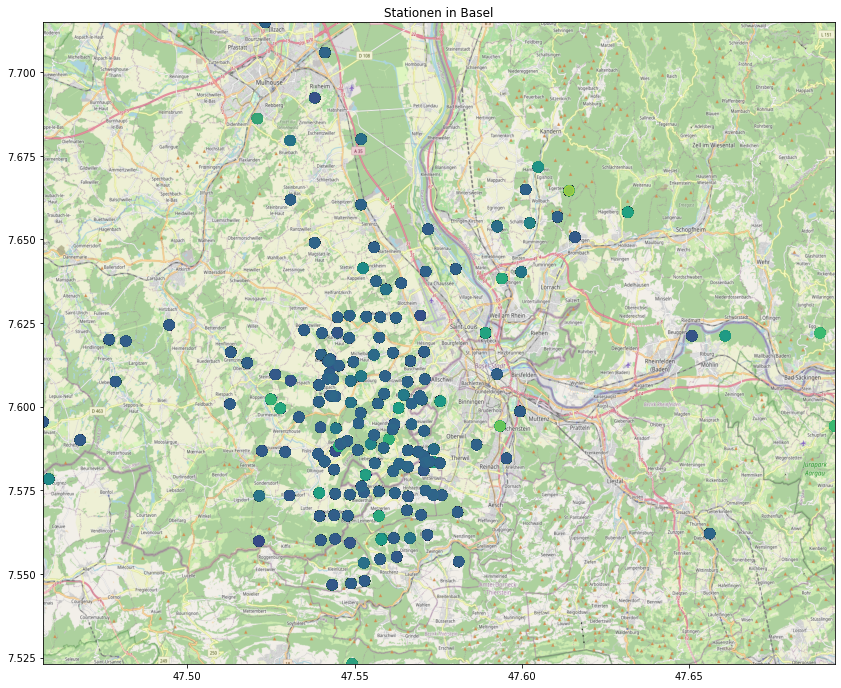

In [225]:
BBox = (df.Breitengrad.min(), df.Breitengrad.max(),df.Längengrad.min(), df.Längengrad.max())

fig = plt.figure(figsize=(17.06,11.8))
plt.scatter(df.Breitengrad, df.Längengrad, zorder=1, alpha= 0.2, c=df.Lufttemperatur, s=100)
plt.title("Stationen in Basel")
plt.xlim(BBox[0], BBox[1])
plt.ylim(BBox[2], BBox[3])

plt.imshow(basel_map, zorder=0, extent = BBox)
plt.show()

In [229]:
(df.Längengrad.min(), df.Längengrad.max(), df.Breitengrad.min(), df.Breitengrad.max())

(7.52312, 7.71486, 47.45687, 47.6935517966)

In [230]:
fig.savefig('smartclimate_stations.png')

In [211]:
first_try = df[df["Datum"] == "2021-08-07"]

In [132]:
len(first_try)

3065

In [217]:
# garbage
lats, longs = [], []
x = datetime.date(2020, 8, 4)

fig = plt.figure(figsize=(17.06,11.8))
plt.scatter(df.Breitengrad, df.Längengrad, zorder=1, alpha= 0.2, c=df.Lufttemperatur, s=100)
plt.title("Stationen in Basel")
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(BBox[0], BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    return ln,


for i in range(0, 5):
    x2 = x.strftime("%Y-%m-%d")
    #print(x2)
    a = df[df["Datum"] == x2]
    x = x + datetime.timedelta(days=1)
    
    lats.append(a["Breitengrad"])
    longs.append(a["Längengrad"])

ani = 0
    

'\nlats, longs = [], []\nx = datetime.date(2020, 8, 4)\n\nfig = plt.figure(figsize=(17.06,11.8))\nplt.scatter(df.Breitengrad, df.Längengrad, zorder=1, alpha= 0.2, c=df.Lufttemperatur\t, s=100)\nplt.title("Stationen in Basel")\nfig, ax = plt.subplots()\nln, = plt.plot([], [], \'ro\')\n\ndef init():\n    ax.set_xlim(BBox[0], BBox[1])\n    ax.set_ylim(BBox[2], BBox[3])\n    return ln,\n\n\nfor i in range(0, 5):\n    x2 = x.strftime("%Y-%m-%d")\n    #print(x2)\n    a = df[df["Datum"] == x2]\n    x = x + datetime.timedelta(days=1)\n    \n    lats.append(a["Breitengrad"])\n    longs.append(a["Längengrad"])\n\nani = 0\n'

In [307]:
BBox = (df.Längengrad.min(), df.Längengrad.max(),df.Breitengrad.min(), df.Breitengrad.max())
x = datetime.datetime(2020, 8, 4, 0)
for i in range(0, 180):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    #print(x2)
    a = df[df["Datum"] == date]
    b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(hours=4)
    
    fig = plt.figure(figsize=(30.1,16.36))
    plt.scatter(b.Längengrad, b.Breitengrad, zorder=1, alpha= 0.8, c=b.Lufttemperatur, s=100)
    plt.title("Stationen in Basel : " + x.strftime("%Y-%m-%d-%H"))
    plt.xlim(BBox[0], BBox[1])
    plt.ylim(BBox[2], BBox[3])
    plt.imshow(basel_map, zorder=0, extent = BBox)
    img_name = "test_images/img" + str(i) + ".png" 
    fig.savefig(img_name)
    plt.close()
    


In [303]:
import imageio
images = []
for i in range(0,50):
    images.append(imageio.imread("test_images/img" + str(i) + ".png"))
imageio.mimsave("test_images/movie2.gif", images, 'GIF', fps=3)

In [254]:
x = datetime.datetime(2020, 8, 4, 12)
for i in range (0,25):
    x += datetime.timedelta(hours=1)
    print(x)

2020-08-04 13:00:00
2020-08-04 14:00:00
2020-08-04 15:00:00
2020-08-04 16:00:00
2020-08-04 17:00:00
2020-08-04 18:00:00
2020-08-04 19:00:00
2020-08-04 20:00:00
2020-08-04 21:00:00
2020-08-04 22:00:00
2020-08-04 23:00:00
2020-08-05 00:00:00
2020-08-05 01:00:00
2020-08-05 02:00:00
2020-08-05 03:00:00
2020-08-05 04:00:00
2020-08-05 05:00:00
2020-08-05 06:00:00
2020-08-05 07:00:00
2020-08-05 08:00:00
2020-08-05 09:00:00
2020-08-05 10:00:00
2020-08-05 11:00:00
2020-08-05 12:00:00
2020-08-05 13:00:00


In [273]:
x = datetime.datetime(2020, 8, 4, 5)

hour = x.strftime("%H")
test = df[df["Stunde"] == int(hour)]
print(hour, int(hour))

05 5


In [268]:
test.head()

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
88,88,0340018F,Areal Wolf (Mast 7),2020-04-21 00:04:23+02:00,2020-04-21,0,4,"47.54245,7.61357",47.54245,7.61357,15.810,0.0,0.0,0.0
89,89,034001AD,Areal Wolf (Mast 6),2020-04-21 00:05:07+02:00,2020-04-21,0,5,"47.54431,7.60302",47.54431,7.60302,16.165,0.0,0.0,0.0
90,90,03400189,Areal Wolf (Mast 3),2020-04-21 00:06:41+02:00,2020-04-21,0,6,"47.54531,7.61225",47.54531,7.61225,15.970,0.0,0.0,0.0
91,91,034001B3,Areal Wolf (Mast 4),2020-04-21 00:06:53+02:00,2020-04-21,0,6,"47.54352,7.61214",47.54352,7.61214,16.065,0.0,0.0,0.0
92,92,0340016A,Areal Wolf (Mast 5),2020-04-21 00:08:02+02:00,2020-04-21,0,8,"47.54363,7.60826",47.54363,7.60826,16.310,0.0,0.0,0.0
